In [1]:
import networkx as net
import matplotlib.pyplot as plot
egypts_file = "data/egypt_retweets.net"

In [2]:
def trim_edges(g, weight=1):
    g2 = net.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f, to, edata)
    return g2

In [3]:
def island_method(g, iterations=5):
    weights = [edata['weight'] for f, to, edata in g.edges(data=True)]
    mn = int(min(weights))
    mx = int(max(weights))
    # Compute the size of the step
    step = int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn, mx, step)]

In [4]:
egypts = net.read_pajek(egypts_file)
len(egypts)

25178

In [5]:
ccsubg = [cc for cc in net.connected_component_subgraphs(egypts)]
len(ccsubg)

3122

In [15]:
# connected_components_subgraphs is deprecated
ccsg = [egypts.subgraph(cc) for cc in net.connected_components(egypts)]
len(ccsg)

3122

In [18]:
example_cn = next(net.connected_components(egypts))
example_cn

{'paisportatil',
 'LindaLMF',
 'CmdrNandr',
 'spicey_trini',
 'haemophiliac_gs',
 'EgyptTopTweets',
 'DrewFromTV',
 'iEcoish',
 'pedrosoler',
 'theimp',
 'unopereira',
 'FreeLibyaNow_',
 'stonekat',
 'Daltonian',
 'banattiba',
 'ALQABBANI1',
 'faissl',
 'ltayef_lar',
 'omarmatansero',
 'ZahratTrablis',
 'lissnup',
 'CyberDissidents',
 'AnaDinescu',
 'TwiztedBizkit',
 'georgegalloway',
 'ReFounderParty',
 'CesareDiRoma',
 'AlterPolitics',
 'gr1953',
 'waelalwani',
 'TofikDibi',
 'lody_y',
 'alhoori22',
 'LaurenBohn',
 'ElCoquiLBorges',
 'arelgendy',
 'Eisa88',
 'ijonmark',
 '2010TwentyTen',
 'JornalNoticias',
 'GOOD',
 'Diya_khalil',
 'donrhycce',
 'GetOutKhaddafi',
 'azharusman',
 'dagbagi',
 'alfonseb',
 'Shahad_M',
 'HumanityNews',
 'OrientalMai',
 'Zzigggyyy',
 'rolandobarrios',
 'ismail_fouad',
 '2xMachin',
 'RamallahNow',
 'berndsy',
 'nohawagih',
 'perucom',
 'josbarrera',
 'AhmedSaqr',
 'Miss_Jayla',
 'marwamaher',
 'DinoDinosaur1',
 'MaryAnnAlbright',
 'solimanm',
 'CabaretArti

In [16]:
egypts.subgraph?

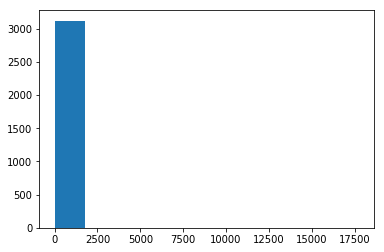

In [6]:
x = [len(cc) for cc in ccsubg]
y = plot.hist(x)

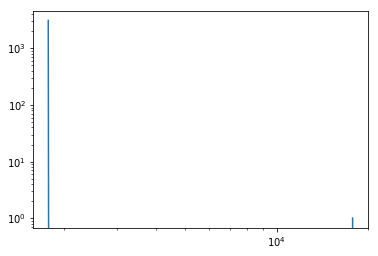

In [7]:
plot.loglog(y[1][1:], y[0])

In [20]:
i = [len(cc) for cc in ccsubg if len(cc) > 10]
i

[17762, 64, 16, 13, 11, 11, 14, 16]

In [25]:
y[1]

array([1.00000000e+00, 1.18506667e+03, 2.36913333e+03, 3.55320000e+03,
       4.73726667e+03, 5.92133333e+03, 7.10540000e+03, 8.28946667e+03,
       9.47353333e+03, 1.06576000e+04, 1.18416667e+04, 1.30257333e+04,
       1.42098000e+04, 1.53938667e+04, 1.65779333e+04, 1.77620000e+04])

In [30]:
bis = ccsubg[0]
islands = island_method(bis)

TypeError: add_edge() takes 3 positional arguments but 4 were given

In [29]:
len(bis)

17762

In [33]:
fe = bis.edges(data=True)
cnt = 0
for fee in fe:
    print(fee[2]['weight'])
    cnt += 1
    if cnt > 10:
        break
    

1.0
8.0
2.0
1.0
1.0
1.0
2.0
12.0
9.0
20.0
6.0
